# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [118]:
import pandas as pd
import numpy as np
df = pd.read_csv('adult.data', header = None, 
                 names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
                        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                        "hours-per-week", "native-country", "50K"], 
                 skipinitialspace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Вопрос 1
Сколько мужчин и женщин в выборке?

In [29]:
men = len(df[df['sex'] == 'Male'])
women = len(df[df['sex'] == 'Female'])
print("Количество мужчин", men)
print("Количество женщин", women)

Количество мужчин 21790
Количество женщин 10771


### Вопрос 2
Каков средний возраст мужчин?


In [55]:
print("Средний возраст мужчин =", df[(df['sex'] == 'Male')]['age'].mean())


Средний возраст мужчин = 39.43354749885268


### Вопрос 3
Какова доля граждан США?

In [84]:
citizensUSA = len(df[(df['native-country'] == 'United-States')])
people = len(df)
print("Доля граждан США ", citizensUSA / people)

Доля граждан США  0.895857006848684


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

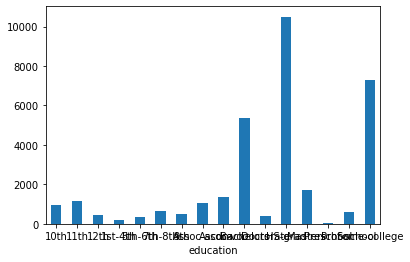

In [100]:
df.plot.bar(x='education-num', y = 'education', rot = 0)


### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [122]:
print("Среднее отклонение ", df[(df['marital-status'] == 'Divorced')]['fnlwgt'].mean())
print("Стандтартное отклонение - ", df[(df['marital-status'] == 'Divorced')]['fnlwgt'].std())

Среднее отклонение  185802.79045689848
Стандтартное отклонение -  105646.78945933603


Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [137]:
people_50k = df[df['50K'] == '>50K']
educational_people_50k = people_50k[(people_50k['education'] == 'Bachelors')|(people_50k['education'] == 'Masters')|(people_50k['education'] == 'HS-grad')|(people_50k['education'] == 'Assoc-acdm')|(people_50k['education'] == 'Assoc-voc')|(people_50k['education'] == 'Doctorate')]
proportion = len(educational_people_50k) / len(people_50k)
print(proportion > 0.5)

True


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [140]:
m = df[df['sex']=='Male'].groupby('race').age.max()
f = df[df['sex']=='Female'].groupby('race').age.max()
print('Men ', m)
print('Women ', f)

Men  race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64
Women  race
Amer-Indian-Eskimo    80
Asian-Pac-Islander    75
Black                 90
Other                 74
White                 90
Name: age, dtype: int64


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [143]:
farmers_fishers = df[df['occupation'] == 'Farming-fishing']
countries = farmers_fishers['native-country'].drop_duplicates()
countries

16       United-States
255           Cambodia
500             Poland
771          Guatemala
861             Mexico
2353           England
3532                 ?
6006       Philippines
6559             Italy
8551       Puerto-Rico
11271          Vietnam
12621          Germany
15177            Japan
16486           Canada
20549       Yugoslavia
21145             Cuba
22391         Portugal
25761      El-Salvador
25943             Hong
28654          Ireland
29466           France
Name: native-country, dtype: object

Вопрос 9

Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [148]:
men_masters = len(df[(df['education'] == 'Masters') & (df['sex'] == 'Male')])
men_bachelors = len(df[(df['education'] == 'Bachelors') & (df['sex'] == 'Male')])
first_proportion = men_bachelors / men_masters

women_masters = len(df[(df['education'] == 'Masters') & (df['sex'] == 'Female')])
women_bachelors = len(df[(df['education'] == 'Bachelors') & (df['sex'] == 'Female')])
second_proportion = women_bachelors / women_masters

if (second_proportion > first_proportion) :
    print("2 больше")
else:
    print("1 больше")

1 больше


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [157]:
max_hours = df['hours-per-week'].max()
print('максимальное количество рабочих часов в неделю ', max_hours)

number_of_people = len(df[df['hours-per-week']== max_hours])
print(number_of_people, 'людей работают столько часов в неделю')

print('их заработок', df[df['hours-per-week'] == max_hours].groupby('50K').sex.count())


максимальное количество рабочих часов в неделю  99
85 людей работают столько часов в неделю
их заработок 50K
<=50K    60
>50K     25
Name: sex, dtype: int64
